In [1]:
using MPSTime
using Plots
using JLD2
using ITensors
using Plots.PlotMeasures

In [2]:
mps_trained_f = jldopen("ipd_d12_chi80_mps_for_see.jld2")
mps_trained = read(mps_trained_f, "mps")
X_train = read(mps_trained_f, "X_train")
X_test = read(mps_trained_f, "X_test")
opts = read(mps_trained_f, "opts")

MPSOptions(-5, 5, 80, 1.0, 12, :Legendre_No_Norm, false, 2, 1.0e-10, 1, Float64, :KLD, :TSGO, false, (false, true), false, false, false, true, false, false, 1234, 4, -1, (0.0, 1.0), false, "divide_and_conquer")

In [4]:
# @save "ipd_seq_mat.jld2" measurement_mat_all_test

In [5]:
@load "ipd_seq_mat.jld2"

1-element Vector{Symbol}:
 :measurement_mat_all_test

In [6]:
ipd_seq_mat_mean = mean(measurement_mat_all_test; dims=1)[1, :, :];
ipd_seq_mat_std = std(measurement_mat_all_test; dims=1)[1, :, :];

In [7]:
clim_min, clim_max = 0, maximum(filter(!isnan,ipd_seq_mat_mean))

(0, 1.6819497422560548)

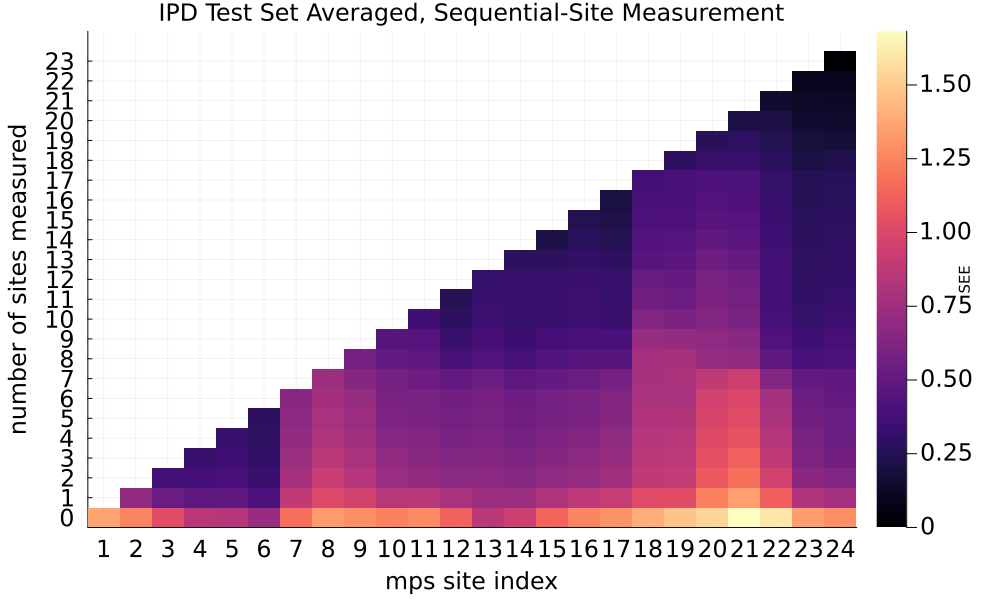

In [8]:
fstyle = font("sans-serif", 16)
heatmap(collect(1:24), collect(0:24), ipd_seq_mat_mean, xticks=1:24, yticks=0:23, 
    xlabel="mps site index", ylabel="number of sites measured",
    title="IPD Test Set Averaged, Sequential-Site Measurement",
    colorbar_title="SEE", c=:magma, clims=(clim_min, clim_max), left_margin=5mm, 
    bottom_margin=5mm, right_margin=5mm, 
    xtickfont=fstyle, 
    titlefont=fstyle,
    guidefont=fstyle,
    ytickfont=fstyle, size=(1000, 600))

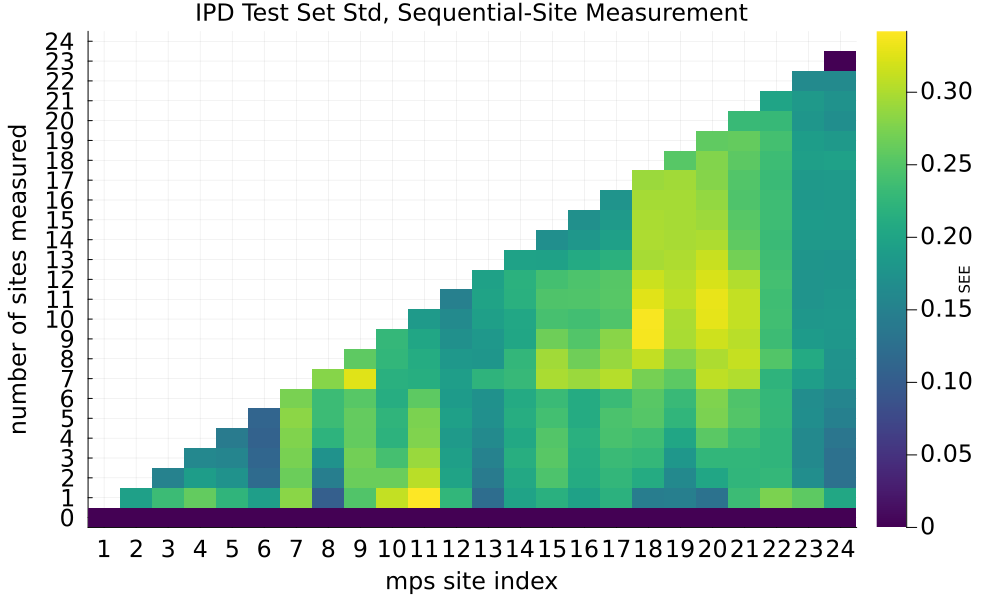

In [9]:
fstyle = font("sans-serif", 16)
heatmap(collect(1:24), collect(0:24), ipd_seq_mat_std, xticks=1:24, yticks=0:24, 
xlabel="mps site index", ylabel="number of sites measured",
    title="IPD Test Set Std, Sequential-Site Measurement",
    colorbar_title="SEE", c=:viridis, left_margin=5mm, 
    bottom_margin=5mm, right_margin=5mm, 
    xtickfont=fstyle, 
    titlefont=fstyle,
    guidefont=fstyle,
    ytickfont=fstyle, size=(1000, 600))

Sum along rows for residual entropy

In [10]:
sum(ipd_seq_mat_mean[1, :])

29.301452606322247

Normalised residual entropy in unmeasured sites (average SEE per site) given some number of measured sites

In [11]:
measurement_mat_all_test[5, 24, :]

24-element Vector{Float64}:
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
   ⋮
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
   3.330669073875469e-16

In [12]:
avg_see_per_measure = [sum(measurement_mat_all_test[1, i, i:end])/length(measurement_mat_all_test[1, i, i:end]) for i in 1:24]

24-element Vector{Float64}:
  1.2208938585967608
  1.0659135922114111
  0.8920626368406542
  0.6242746201256824
  0.6317671638906852
  0.6401130286947486
  0.647012327439577
  0.5272680432792537
  0.4342760405799144
  0.38318014837766423
  ⋮
  0.013116295749932665
  0.011835947302606904
  0.06937640869167598
  0.13210523275737293
  0.33795083360755007
  0.2923280428422631
  0.374251912965859
  0.21800862459850345
 -2.220446049250313e-16

In [13]:
residual_entropy_allsamps = Matrix{Float64}(undef, size(measurement_mat_all_test, 1), 24)
for s in 1:size(measurement_mat_all_test, 1)
    residual_entropy_allsamps[s, :] = [sum(measurement_mat_all_test[s, i, i:end])/length(measurement_mat_all_test[s, i, i:end]) for i in 1:24]
end

In [14]:
mean_res_entr = mean(residual_entropy_allsamps, dims=1)[1, :]
std_res_entr = std(residual_entropy_allsamps, dims=1)[1, :]

24-element Vector{Float64}:
 6.664577310669212e-16
 0.18480300427005003
 0.14534679362164393
 0.1487285536860023
 0.15678659861075533
 0.16988553466554182
 0.17104021691313814
 0.20701690817232432
 0.19901312505051183
 0.19941856099685903
 ⋮
 0.183261997027272
 0.18976413620586896
 0.20255789600219476
 0.2004315206138565
 0.2060098074831186
 0.18689131692431857
 0.17827598531462896
 0.16163918483404366
 1.2601307685950131e-14

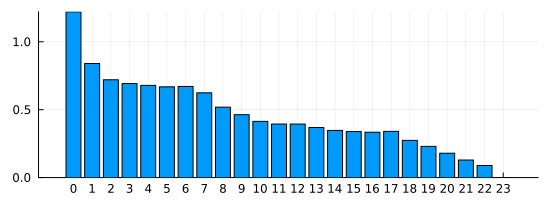

In [15]:
bar(collect(0:23), mean_res_entr, xticks=0:1:23, label="", yticks=0:0.5:1.5,
    size=(550, 200))
#savefig("ipd_resid_see_barplot.svg")